In [226]:
import pandas as pd
import requests
import json
import seaborn as sns
from matplotlib import pyplot as plt

# Variações no número de restaurantes ao longo do tempo

In [2]:
nov = pd.read_csv("versao_upada_pro_kaggle\ifood-restaurants-november-2020.csv")
fev = pd.read_csv("versao_upada_pro_kaggle\ifood-restaurants-february-2021.csv")

In [6]:
print("Restaurantes em nov:", len(nov))
print("Restaurantes em fev:", len(fev))
print("Crescimento no número de restaurantes:", len(fev)-len(nov))

Restaurantes em nov: 361447
Restaurantes em fev: 406399
Crescimento no número de restaurantes: 44952


In [280]:
# Mas nem todos os restaurantes de nov continuam no iFood em fev
# juntar os dois datasets com base em "id" (ou seja, contar restaurantes)
# contar o numero de vezes que o id apareceu duas vezes (ou seja, tá em fev e nov)
query = nov.append(fev)['id'].value_counts().value_counts()
print("Restaurantes que estavam no iFood em nov e fev:", list(query)[0])
print("Restaurantes que entraram no iFood entre nov e fev:", list(query)[1])
# Os outros 76628 são os restaurantes que entraram no iFood, subtraindo esse número pelo crescimento no período:
print("Restaurantes que saíram entre fev e nov:", list(query)[1] - (len(fev) - len(nov)))
print("Relação entre restaurantes entrando / restaurantes saindo", list(query)[1]/(list(query)[1] - (len(fev) - len(nov))))

Restaurantes que estavam no iFood em nov e fev: 345609
Restaurantes que entraram no iFood entre nov e fev: 76628
Restaurantes que saíram entre fev e nov: 31676
Relação entre restaurantes entrando / restaurantes saindo 2.4191185755777243


# Distribuição geográfica

In [82]:
# a id pode seer usada para obter a localização específica do restaurante
restaurant_id = exemplo[34:].split("/")[2]

response = requests.get(f"https://marketplace.ifood.com.br/v1/merchants/{restaurant_id}/extra")
content = response.content
restaurant_info = json.loads(content)
restaurant_info['address']

{'district': 'Parque Ferroviário de Brasília',
 'city': 'BRASILIA',
 'state': 'DF',
 'country': 'BR',
 'latitude': -15.779129,
 'longitude': -47.941056,
 'timezone': 'Etc/GMT+3',
 'zipCode': '70631970',
 'streetName': 'Shopping Popular de Brasília',
 'streetNumber': '14',
 'streetCompl': '14- B'}

In [254]:
# ranking de numero de restaurantes por cidade 
# (não muito confiável, melhor seria usar o método da request que usei na célula acima)
# para aumentar um pouquinho a confiabilidade podemos usar os dois datasets
rest_fev = fev['url'].apply(lambda x: x.split('/')[4]).value_counts()
rest_nov =  nov['url'].apply(lambda x: x.split('/')[4]).value_counts()
rest_media = (rest_fev+rest_nov)/2
rest_media.sort_values(ascending=False).iloc[:20]
# um detalhe: parece que as cidades vizinhas a São Paulo estão sendo contabilizadas como São Paulo

sao-paulo-sp                53747.5
rio-de-janeiro-rj           27991.5
belo-horizonte-mg           13601.0
curitiba-pr                  8507.0
fortaleza-ce                 6891.0
goiania-go                   6753.0
recife-pe                    6246.5
salvador-ba                  6002.5
porto-alegre-rs              5811.0
guarulhos-sp                 5212.0
campinas-sp                  4566.5
manaus-am                    4235.0
brasilia-df                  4087.0
campo-grande-ms              3668.5
belem-pa                     3667.0
osasco-sp                    3652.0
sao-goncalo-rj               3589.0
maceio-al                    3580.0
ribeirao-preto-sp            3266.0
sao-bernardo-do-campo-sp     3259.5
Name: url, dtype: float64

In [243]:
# numero de restaurantes por estado
estados = pd.DataFrame(fev['url'].apply(lambda x: x.split('/')[4].split("-")[-1]).value_counts())
estados = estados.reset_index()
estados.columns = ['estado', 'quantidade']
print(estados)

   estado  quantidade
0      sp      147721
1      rj       57253
2      mg       38578
3      pr       22972
4      rs       19200
5      sc       14080
6      pe       13390
7      ba       13358
8      go       12801
9      ce        9362
10     es        7658
11     pa        6566
12     ms        4835
13     am        4643
14     mt        4526
15     pb        4439
16     al        4285
17     df        4238
18     rn        3758
19     se        3660
20     ma        2400
21     pi        2088
22     ro        1749
23     ap        1016
24     ac         949
25     rr         765
26     to         109


Text(0.5, 1.0, 'Número de Restaurantes por Estado')

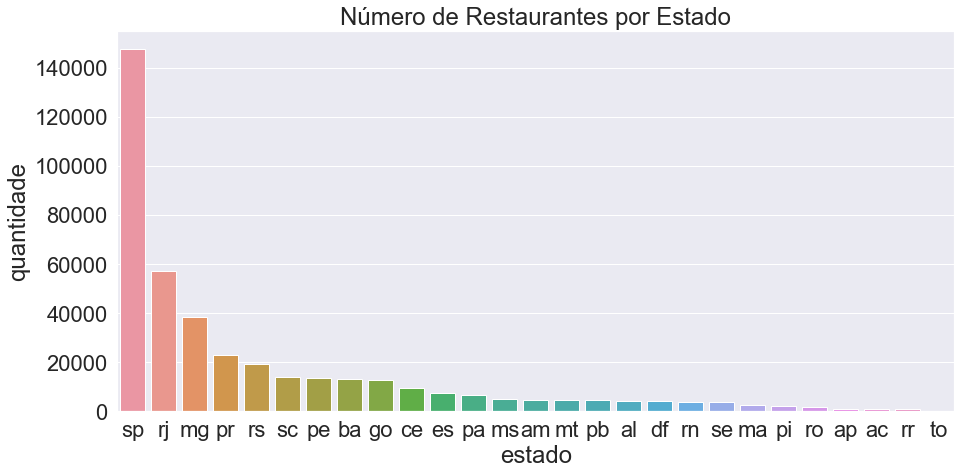

In [264]:
plt.figure(figsize=[15, 7])
sns.set(font_scale=2)
sns.barplot(estados['estado'], estados['quantidade'])
plt.title("Número de Restaurantes por Estado")

Text(0.5, 1.0, 'Categorias mais comuns no Brasil')

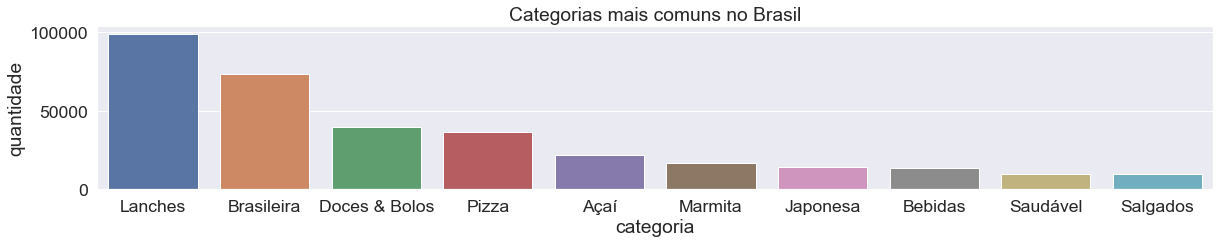

In [287]:
# pegar categorias mais famosas do Brasil
holder = pd.DataFrame(fev['category'].value_counts())    
holder = holder.sort_values(by='category', ascending=False).iloc[:10]
holder = holder.reset_index()
holder.columns = ['categoria', 'quantidade']

sns.set(font_scale=1.6)
plt.figure(figsize=[20, 3])
sns.barplot(holder['categoria'], holder['quantidade'])
plt.title('Categorias mais comuns no Brasil')

In [255]:
# pegar categorias mais famosas por região
# pivot table inicial
fev['estado'] = fev['url'].apply(lambda x: x[34:].split("/")[0].split("-")[-1])
pd.pivot_table(fev, index=['estado'], columns = ['category'], values='id', aggfunc='count')

category,Africana,Alemã,Argentina,Asiática,Açaí,Baiana,Bebidas,Brasileira,Cafeteria,Carnes,...,Sorvetes,Tailandesa,Tapioca,Típica do Norte,Variada,Vegana,Vegetariana,Xis,Yakisoba,Árabe
estado,,,,,,,,,,,,,,,,,,,,,
ac,NaN,NaN,3.0,1.0,29.0,NaN,15.0,208.0,9.0,25.0,...,31.0,NaN,NaN,1.0,6.0,NaN,NaN,NaN,NaN,5.0
al,2.0,NaN,5.0,2.0,362.0,1.0,77.0,838.0,26.0,74.0,...,84.0,NaN,6.0,NaN,25.0,7.0,3.0,NaN,NaN,13.0
am,NaN,2.0,2.0,3.0,125.0,NaN,77.0,948.0,135.0,144.0,...,61.0,1.0,5.0,5.0,52.0,NaN,8.0,1.0,NaN,10.0
ap,NaN,NaN,NaN,NaN,37.0,NaN,20.0,285.0,15.0,13.0,...,25.0,NaN,NaN,2.0,9.0,NaN,1.0,NaN,NaN,NaN
ba,18.0,1.0,19.0,5.0,789.0,41.0,318.0,2782.0,73.0,269.0,...,232.0,2.0,13.0,NaN,113.0,16.0,17.0,1.0,21.0,46.0
ce,6.0,3.0,7.0,6.0,508.0,NaN,220.0,1667.0,88.0,190.0,...,192.0,NaN,9.0,1.0,91.0,11.0,20.0,NaN,2.0,20.0
df,1.0,4.0,6.0,3.0,157.0,6.0,158.0,887.0,82.0,112.0,...,103.0,4.0,2.0,NaN,36.0,9.0,17.0,NaN,2.0,49.0
es,1.0,2.0,8.0,NaN,1121.0,8.0,181.0,1159.0,37.0,198.0,...,125.0,1.0,2.0,NaN,80.0,4.0,10.0,NaN,1.0,40.0
go,1.0,4.0,13.0,2.0,1017.0,4.0,418.0,2670.0,84.0,226.0,...,246.0,3.0,7.0,1.0,77.0,12.0,14.0,NaN,NaN,61.0


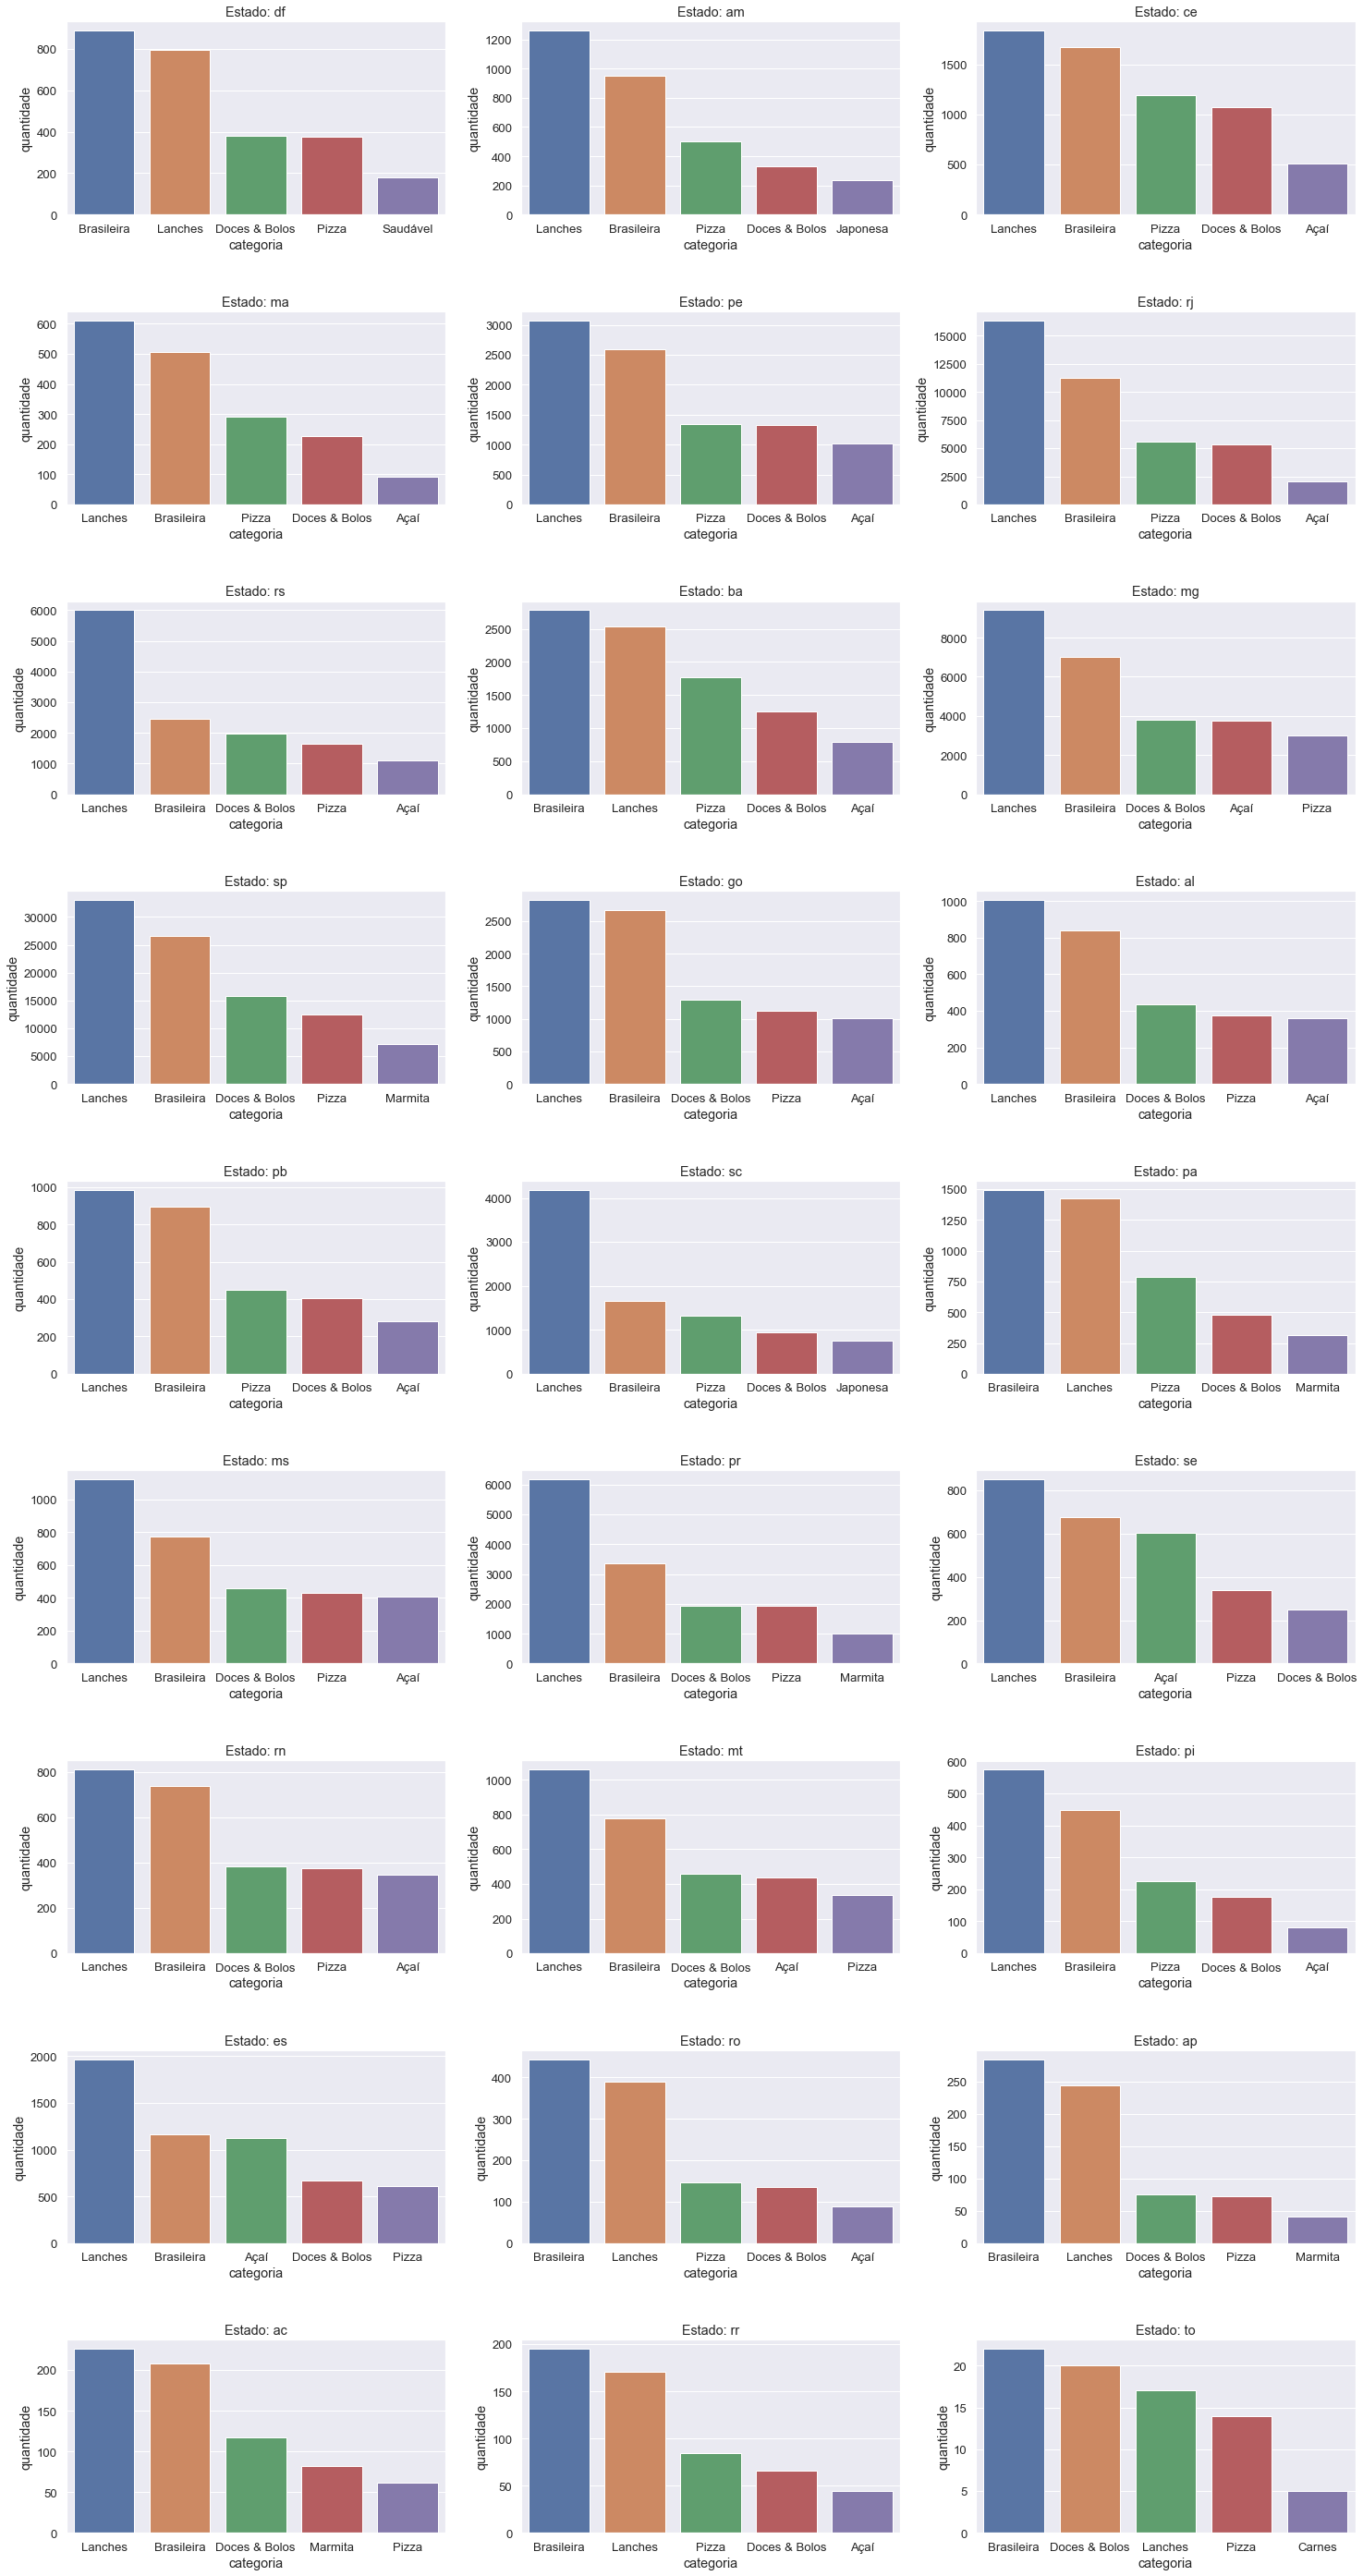

In [273]:
# pegar categorias mais famosas por região
# Pegar o top 5 de cada estado
count = 0
plt.figure(figsize=[25, 50])
sns.set(font_scale=1.2)
for i in list(fev['estado'].unique()):
    count += 1
    holder = pd.DataFrame(fev['category'][fev['estado'] == i].value_counts())    
    holder = holder.sort_values(by='category', ascending=False).iloc[:5]
    holder = holder.reset_index()
    holder.columns = ['categoria', 'quantidade']

    plt.subplot(9, 3, count)    
    sns.barplot(holder['categoria'], holder['quantidade'])
    plt.title('Estado: ' + i)  
    #print("")
    #print("Estado:", i)
    #print(holder)
    #print("")
plt.subplots_adjust(hspace=0.5)

# Outras análises

In [257]:
# Nomes mais comuns
fev['name'].value_counts()

Sabor Caseiro                   186
Divino Sabor                    132
Sabor de Casa                   115
Doce Sabor                      113
Cantinho do Sabor               103
                               ... 
Espoca Bucho                      1
Pizzaria Coco Bambu Meireles      1
Bibica Candies Express            1
Faultless Chocolates              1
Varanda Espetaria                 1
Name: name, Length: 345846, dtype: int64

In [276]:
# Price ranges mais comuns
fev['price_range'].value_counts()

CHEAPEST          294140
MODERATE           44769
CHEAP              43100
EXPENSIVE          15778
MOST_EXPENSIVE      8612
Name: price_range, dtype: int64